
# Project: IMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will be analyzing the "TMDb movie data" dataset  This dataset contains information on 10,000 movies collected from The Movie Database(TMDb). The  interesting information in this dataset lead  me to ask the following questions:

1- What genres are most popular over the years?

2- Is movie runtime lengthened or shortened over time?


In [194]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

Here a few columns that have multiple strings of information that should be separated out be cause some of data I'm not intrested in.

In [195]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [196]:
# find out number of rows and columns of dataset
df.shape

(10866, 21)

In [197]:
# summary for dataset including datatypes and check for missingdata.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [198]:
# statistics for each column.
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

### Data Cleaning

I will make adjustment to the dataset. I will remove extraneous data and duplicates, then add and replace information to ensure our dataset is clean for analysis.

In [199]:
df.drop(['imdb_id', 'id', 'budget', 'popularity', 'revenue', 'production_companies', 'release_date', 'cast'], axis=1,  inplace=True)
df.head()

original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  vote_count  vote_average  \
0  Action|Adventure|Science Fiction|Thriller        5562           6.5   
1  Action|Adventure|Science Fiction|Thriller        6185           7.1   
2         Adventure|Science Fiction|Thriller        2480           6.3   
3   Action|Adventure|Science Fiction|Fantasy        5292           7.5   
4                      Action|Crime|Thriller        2947           7.3   

   release_year    budget_adj   revenue_adj  
0          2015  1.379999e+08  1.392446e+09  
1          2015  1.379999e+08  3.481613e+08  
2          2015  1.012000e+08  2.716190e+08  
3          2015  1.839999e+08  1.902723e+09  
4          2015  1.747999e+08  1.385749e+09

In [200]:
#assess if there are any duplicates.
sum(df.duplicated())

1

In [201]:
# to remove the duplicates
df.drop_duplicates(inplace=True)
print(sum(df.duplicated()))
print(df.shape)

0
(10865, 13)


In [202]:
# check if there is any missing values.
df.isnull().sum()

original_title       0
homepage          7929
director            44
tagline           2824
keywords          1493
overview             4
runtime              0
genres              23
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
dtype: int64

In [203]:
# here i will view the rows with missing info 
df[df.isnull().any(axis=1)].sort_values(['runtime'], ascending=True)

original_title  \
616                                         The Outfield   
1241                                           Dance-Off   
5938                                         Go Goa Gone   
92                              Mythica: The Necromancer   
5992                                    Amiche da morire   
8874                                     Mission Kashmir   
3329                            Grande, grosso e Verdone   
6040                               The Vatican Exorcisms   
3794                                Toi, moi, les autres   
4063                              Madea's Family Reunion   
6383                            The 12 Dogs of Christmas   
445                        The Exorcism of Molly Hartley   
486                                   If There Be Thorns   
3857                                            Cell 213   
3884                                              eCupid   
4138                                  A Time for Dancing   
1849                                        Spectacular!   
2370                                     Freshman Father   
6934                                       Jean-Philippe   
5216                               Madea's Class Reunion   
6552                                     Quatre Ã©toiles   
1293                                            Tim Maia   
5695                                    Skinwalker Ranch   
5920                              The Food Guide to Love   
410                                       Anarchy Parlor   
595                                            Deep Dark   
4829                                                Rags   
4944                                 How to Fall in Love   
2315                                Listen to Your Heart   
10550                                           Luxo Jr.   
...                                                  ...   
4864                                   Political Animals   
4098                                            Rose Red   
10304                                         Gettysburg   
2630                                Storm of the Century   
6829                                       The Lost Room   
7608                                             Tin Man   
5330                                         The Shining   
4306                                               Riget   
1183                                           Ascension   
7267                                      Long Way Round   
415                                       Show Me a Hero   
8173                                 Pride and Prejudice   
2107                                              Carlos   
5121                                   Angels in America   
7256                                           SoupÃ§ons   
4939                           The Men Who Built America   
4198                                           The Stand   
9300                                       Lonesome Dove   
4788                                   World Without End   
6008   Crystal Lake Memories: The Complete History of...   
2843                                     The Blue Planet   
8766                                    The 10th Kingdom   
2170                            The Pillars of the Earth   
3141                                     Generation Kill   
3356                                          John Adams   
6894                                        Planet Earth   
6181                             North and South, Book I   
6176                                               Shoah   
4041                                               Taken   
3894                       The Story of Film: An Odyssey   

                                                homepage  \
616                                                  NaN   
1241                                                 NaN   
5938                                                 NaN   
92             http://www.mythicamovie.com/#!blank/y9ake   
5992                 

In [204]:
df.dropna(inplace=True)
print(df.isnull().sum().any())
print(df.info())

False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 10819
Data columns (total 13 columns):
original_title    2089 non-null object
homepage          2089 non-null object
director          2089 non-null object
tagline           2089 non-null object
keywords          2089 non-null object
overview          2089 non-null object
runtime           2089 non-null int64
genres            2089 non-null object
vote_count        2089 non-null int64
vote_average      2089 non-null float64
release_year      2089 non-null int64
budget_adj        2089 non-null float64
revenue_adj       2089 non-null float64
dtypes: float64(3), int64(3), object(7)
memory usage: 228.5+ KB
None


<a id='eda'></a>
## Exploratory Data Analysis


<a id='intro'></a>


Now after cleaning our data, let's move on to exploration. In this part, we'll compute statistics and create visualizations with to address our questions.
Now lets view all columns with numerical data with a histogram:


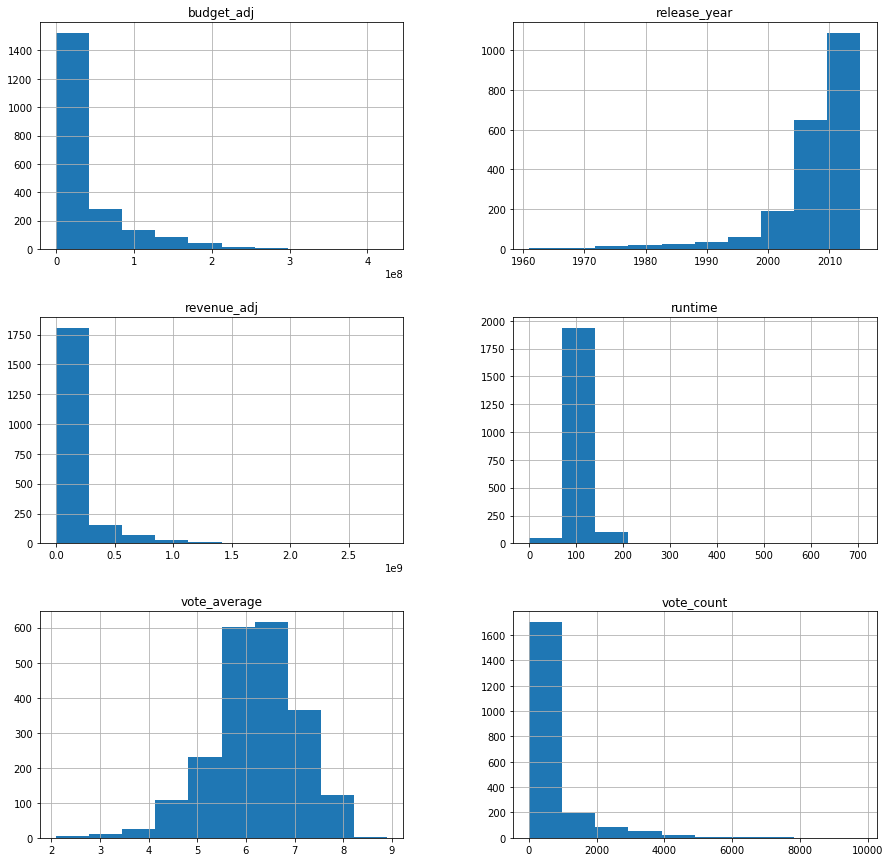

In [151]:
df.hist(figsize=(15,15));

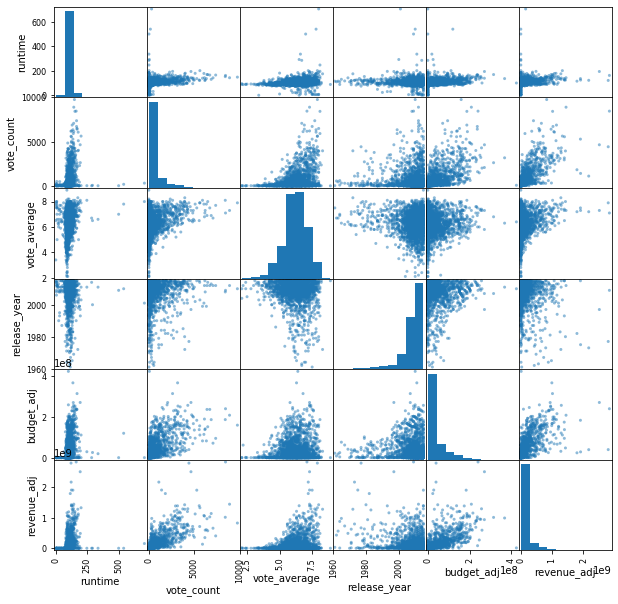

In [152]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

In [207]:
#Checking for Null Values in each column
df.isnull().sum()

original_title    0
homepage          0
director          0
tagline           0
keywords          0
overview          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [166]:
df_split_genre = df.copy()
split_genre = df_split_genre['genres'].str.split('|').apply(pd.Series, 1 ).stack().reset_index(level=1, drop=True)
split_genre.name = 'genre_split'
df_split_genre = df_split_genre.drop(['genres'], axis=1).join(split_genre)

### 1- What genres are most popular over the years?

Text(0, 0.5, 'Movie count')

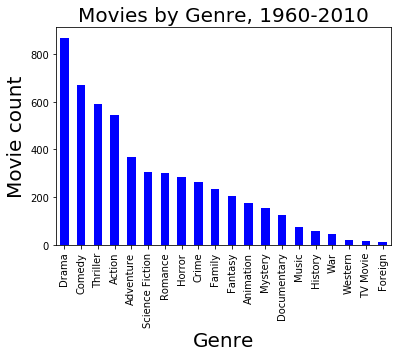

In [191]:
df_split_genre['genre_split'].value_counts().plot(kind='bar', color='b')
plt.title('Movies by Genre, 1960-2010', size=20)
plt.xlabel('Genre', size=20)
plt.ylabel('Movie count', size=20)

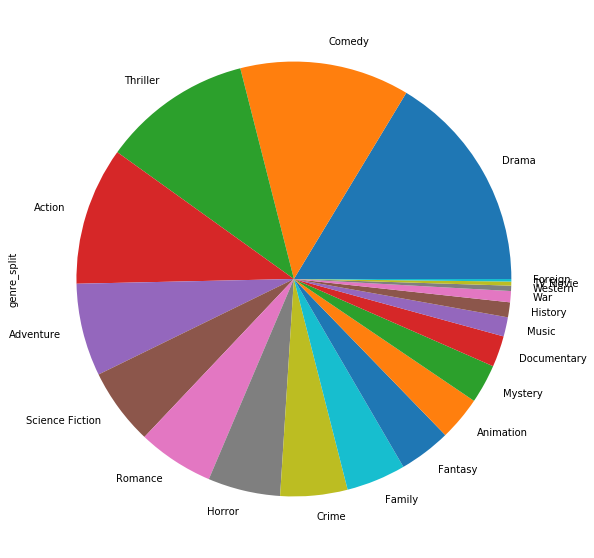

In [206]:
# also view with a pie chart
df_split_genre['genre_split'].value_counts().plot(kind='pie', figsize=(10,10))

Drama, Comedy, Thriller, and Action are the most popular genres in general. The pie chart is a better visual since we can assess that these top 4 genres make up about 50% of all movies. TV Movies, Westerns, and Foreigns are the least popular genres.

### 2- Is movie runtime lengthened or shortened over time?


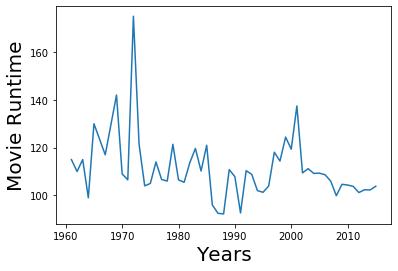

In [188]:
runtime = df.groupby('release_year')['runtime'].mean()
plt.plot(runtime)
plt.xlabel('Years', size=20)
plt.ylabel('Movie Runtime', size=20);

Runtime has decreased throughout the years

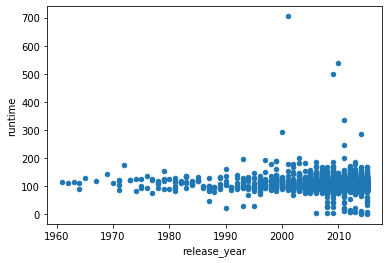

In [189]:
df.plot(x='release_year', y='runtime', kind='scatter');

Runtime has decreased from the 1960s through 2010's.

<a id='conclusions'></a>
## Conclusions

Finally, I summarize  the results that have been performed.

1- Drama, Comedy, Thriller, and Action are the most popular genres in general, where TV Movies, Westerns, and Foreigns are the least popular.

2-In 1960, Drama has been the most popular genre per decade except for the 80's when Comedy was more poular.

3-Runtime lengths have decreased from 1960 to 2010.

## Limitations

This data collected through The Movie Databae (TMDB). The value of 'popularity' and 'votes' is and dependent on those users voting and navigating through the website.